# Partial Principal Components Analysis (PartialPCA)  - Cars Dataset

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
#activation des tables interactifs
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [2]:
# Load cars2006 datasets
from scientisttools import load_cars2006
D = load_cars2006(which="all")
D

CYL  PUISS  LONG  LARG  POIDS  VMAX     PRIX  RPOIDPUIS  \
Modele                                                                      
Alfasud TI       1350     79   393   161    870   165  30570.0  11.012658   
Audi 100         1588     85   468   177   1110   160  39990.0  13.058824   
Simca 1300       1294     68   424   168   1050   152  29600.0  15.441176   
Citroen GS Club  1222     59   412   161    930   151  28250.0  15.762712   
Fiat 132         1585     98   439   164   1105   165  34900.0  11.275510   
Lancia Beta      1297     82   429   169   1080   160  35480.0  13.170732   
Peugeot 504      1796     79   449   169   1160   154  32300.0  14.683544   
Renault 16 TL    1565     55   424   163   1010   140  32000.0  18.363636   
Renault 30       2664    128   452   173   1320   180  47700.0  10.312500   
Toyota Corolla   1166     55   399   157    815   140  26540.0  14.818182   
Alfetta 1.66     1570    109   428   162   1060   175  42395.0   9.724771   
Princess 1800    1798     82   445   172   1160   158  33990.0  14.146341   
Datsun 200L      1998    115   469   169   1370   160  43980.0  11.913043   
Taunus 2000      1993     98   438   170   1080   167  35010.0  11.020408   
Rancho           1442     80   431   166   1129   144  39450.0  14.112500   
Mazda 9295       1769     83   440   165   1095   165  27900.0  13.192771   
Opel Rekord      1979    100   459   173   1120   173  32700.0  11.200000   
Lada 1300        1294     68   404   161    955   140  22100.0  14.044118   
Peugeot 604      2664    136   472   177   1410   180      NaN        NaN   
Peugeot 304 S    1288     74   414   157    915   160      NaN        NaN   

                FINITION  
Modele                    
Alfasud TI           2_B  
Audi 100            3_TB  
Simca 1300           1_M  
Citroen GS Club      1_M  
Fiat 132             2_B  
Lancia Beta         3_TB  
Peugeot 504          2_B  
Renault 16 TL        2_B  
Renault 30          3_TB  
Toyota Corolla       1_M  
Alfetta 1.66        3_TB  
Princess 1800        2_B  
Datsun 200L         3_TB  
Taunus 2000          2_B  
Rancho              3_TB  
Mazda 9295           1_M  
Opel Rekord          2_B  
Lada 1300            1_M  
Peugeot 604          NaN  
Peugeot 304 S        NaN

In [3]:
# Chargement des librairies
from scientisttools import PartialPCA, fviz_screeplot,fviz_partialpca_ind
res_partialpca = PartialPCA(n_components=None,standardize=True,partial=0,ind_sup=[18,19],quanti_sup=[6,7],quali_sup=8,parallelize=False)
res_partialpca.fit(D)

PartialPCA(ind_sup=[18, 19], n_components=None, partial=0, quali_sup=8,
           quanti_sup=[6, 7])

In [4]:
from scientisttools import summaryPartialPCA
summaryPartialPCA(res_partialpca)

                     Partial Principal Component Analysis - Results                     

Importance of components
                          Dim.1   Dim.2   Dim.3   Dim.4    Dim.5
Variance                  2.401   1.613   0.699   0.183    0.104
Difference                0.788   0.914   0.515   0.080      NaN
% of var.                48.021  32.263  13.974   3.670    2.072
Cumulative of % of var.  48.021  80.285  94.258  97.928  100.000

Individuals (the 10 first)

                 Weight  Sq. Dist.  Inertia  % Inertia  Dim.1     ctr   cos2  \
Alfasud TI        0.056      9.002    0.500     10.002 -1.921   8.539  0.410   
Audi 100          0.056     13.185    0.733     14.650  3.117  22.473  0.737   
Simca 1300        0.056      2.012    0.112      2.235  1.132   2.967  0.638   
Citroen GS Club   0.056      0.933    0.052      1.037 -0.798   1.473  0.682   
Fiat 132          0.056      3.213    0.179      3.570  0.803   1.490  0.200   
Lancia Beta       0.056      5.594    0.311      6.

## Eigenvalues

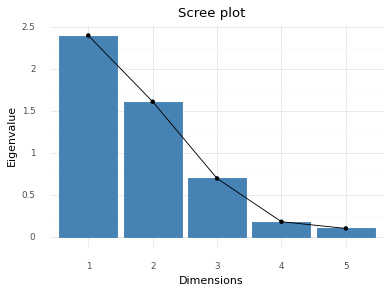

In [5]:
p = fviz_screeplot(res_partialpca,choice="eigenvalue")
print(p)

## Individuals

### Color by RGB color

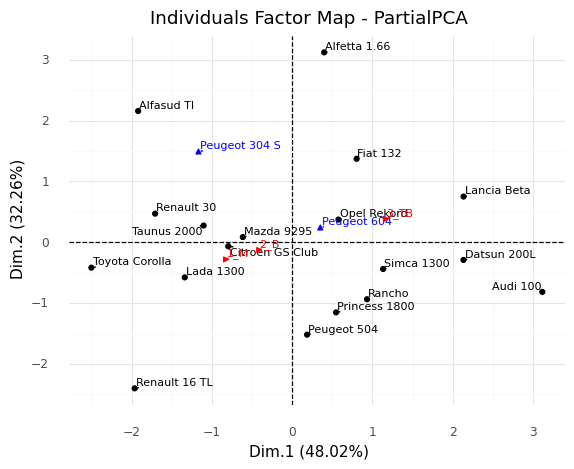

In [6]:
p = fviz_partialpca_ind(res_partialpca,repel=True)
print(p)

### Color by cos2

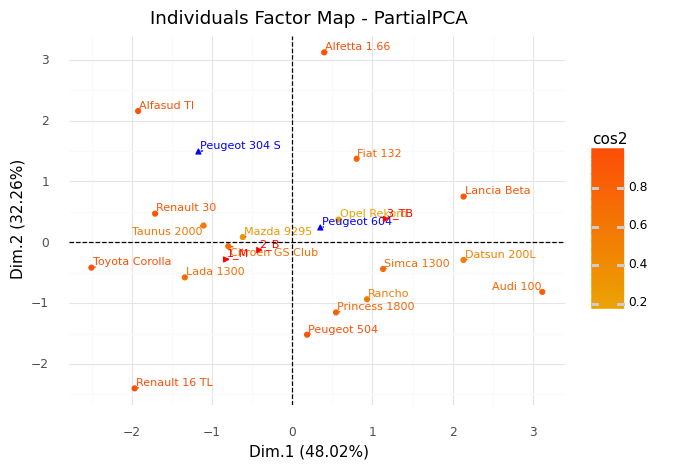

In [7]:
p = fviz_partialpca_ind(res_partialpca,color="cos2",repel=True)
print(p)

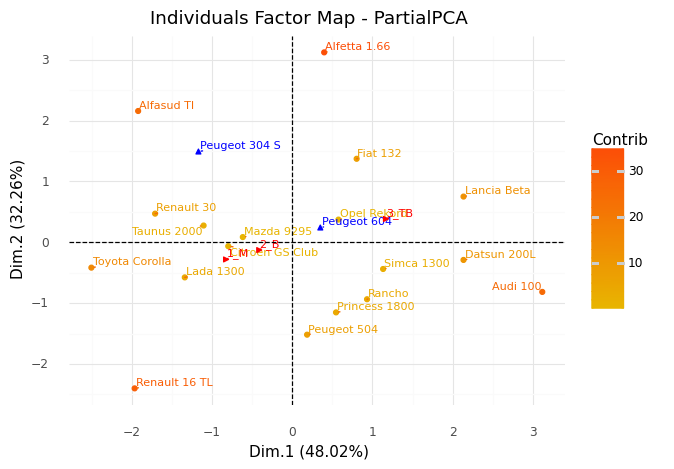

In [8]:
p = fviz_partialpca_ind(res_partialpca,color="contrib",repel=True)
print(p)

### Color by quantitative columns

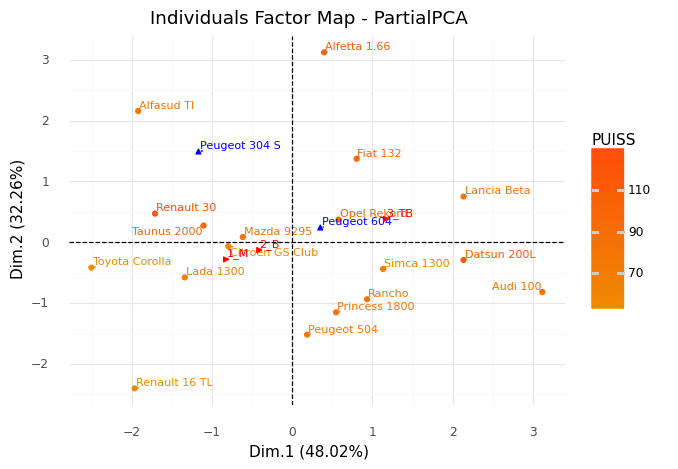

In [9]:
p = fviz_partialpca_ind(res_partialpca,color="PUISS",repel=True)
print(p)

### Color by numpy array

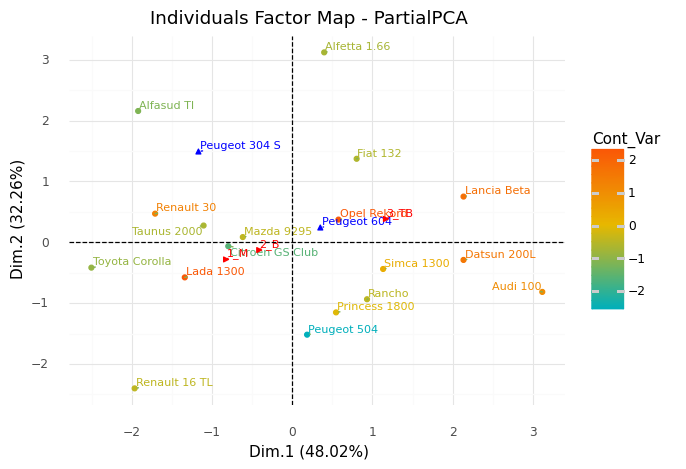

In [10]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_partialpca.call_.X.shape[0])
p = fviz_partialpca_ind(res_partialpca,color=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

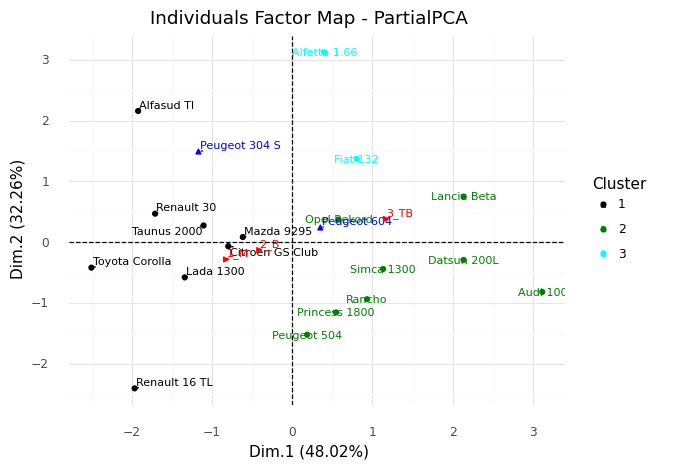

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_partialpca.ind_.coord)
p = fviz_partialpca_ind(res_partialpca,color=kmeans,repel=True)
print(p)

### Set limit

#### limit cos2

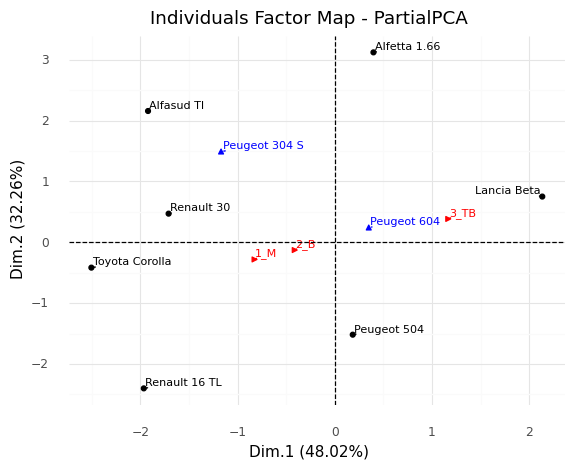

In [12]:
p = fviz_partialpca_ind(res_partialpca,lim_cos2=0.8,repel=True)
print(p)

#### limit contrib

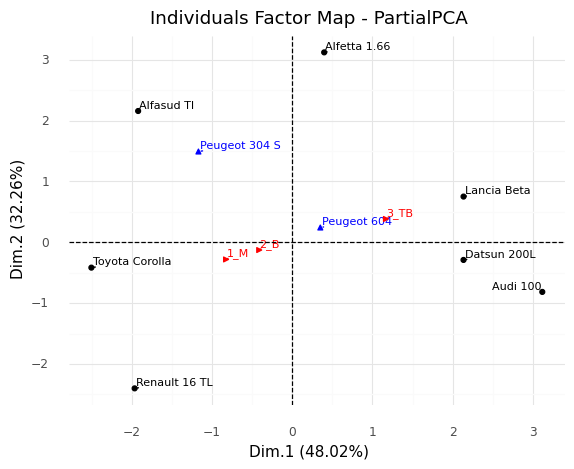

In [13]:
p = fviz_partialpca_ind(res_partialpca,lim_contrib=10,repel=True)
print(p)

## Variables Factor Map

### Color by RGB color

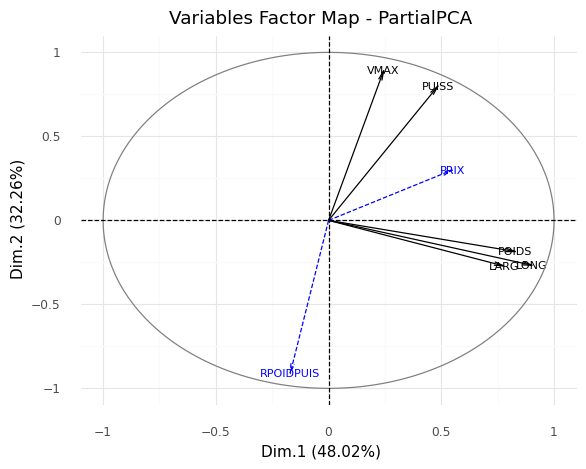

In [14]:
from scientisttools import fviz_partialpca_var
p = fviz_partialpca_var(res_partialpca)
print(p)

### Color by cos2

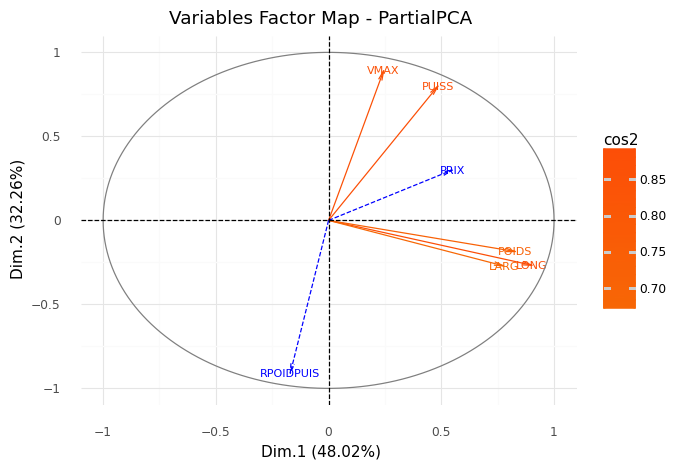

In [15]:
p = fviz_partialpca_var(res_partialpca,color="cos2")
print(p)

### Color by contrib

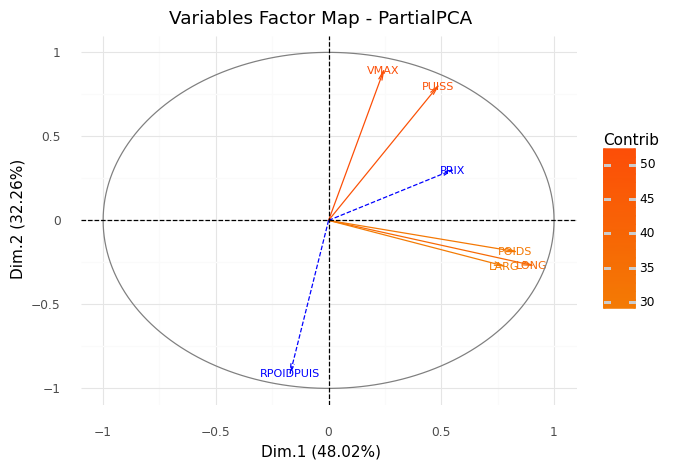

In [16]:
p = fviz_partialpca_var(res_partialpca,color="contrib")
print(p)

### Color by numpy array

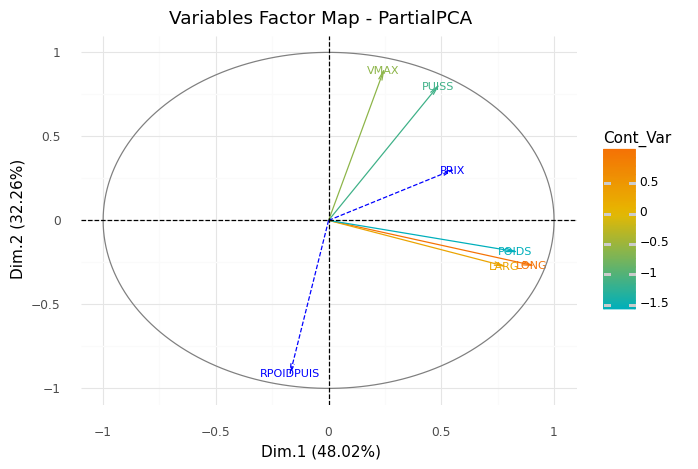

In [17]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_partialpca.var_.coord.shape[0])
p = fviz_partialpca_var(res_partialpca,color=color_numpy)
print(p)

### Color by kmeans clustering

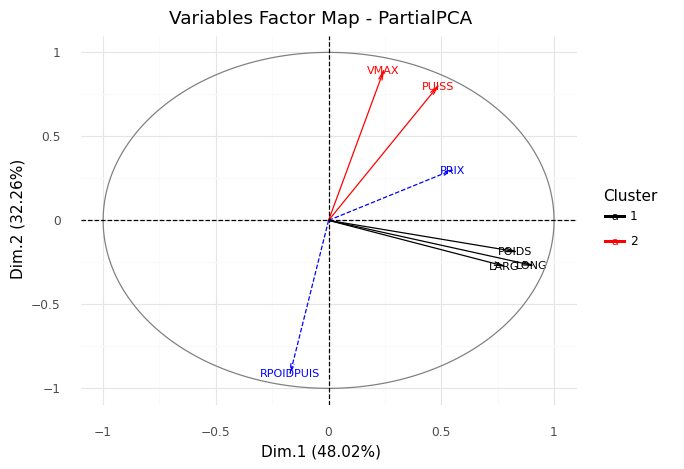

In [18]:
kmeans = KMeans(n_clusters=2, random_state=np.random.seed(123), n_init="auto").fit(res_partialpca.var_.coord)
p = fviz_partialpca_var(res_partialpca,color=kmeans)
print(p)

### Set limit

#### limit cos2

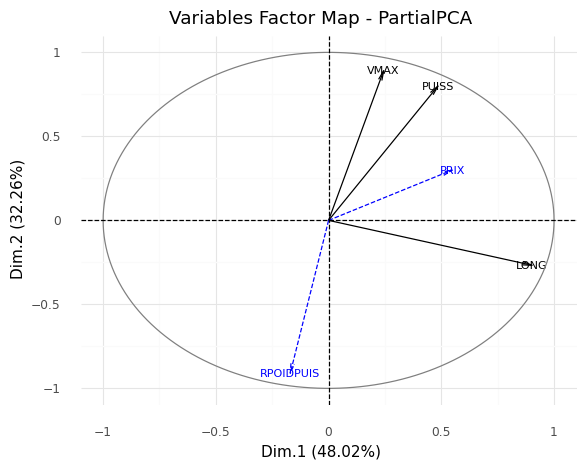

In [19]:
p = fviz_partialpca_var(res_partialpca,lim_cos2=0.85)
print(p)

#### Limit contrib

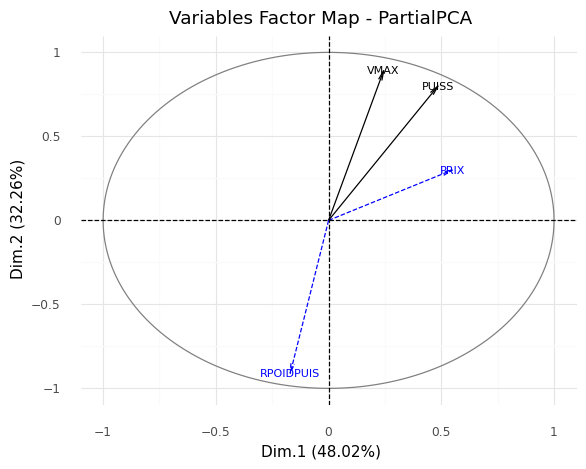

In [20]:
p = fviz_partialpca_var(res_partialpca,lim_contrib=40)
print(p)

## Plot contrib

No module named 'seaborn._oldcore'


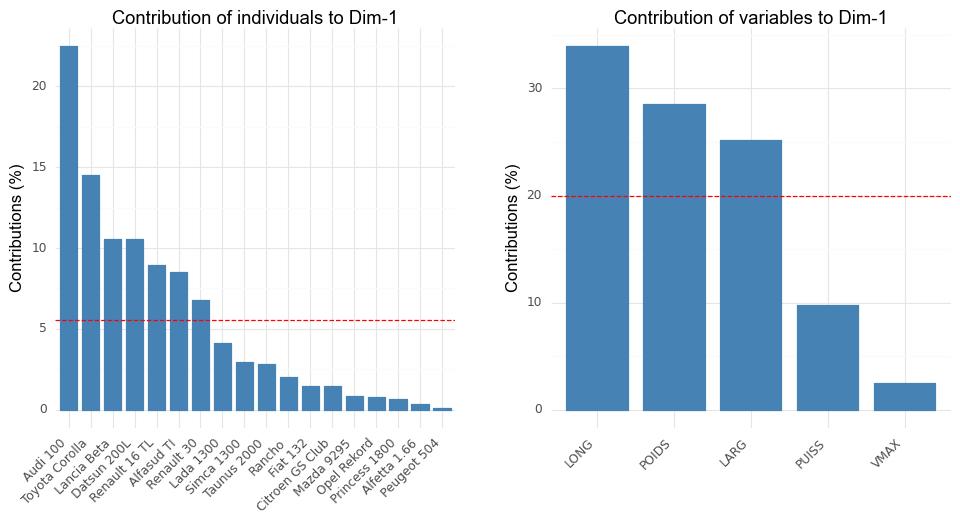

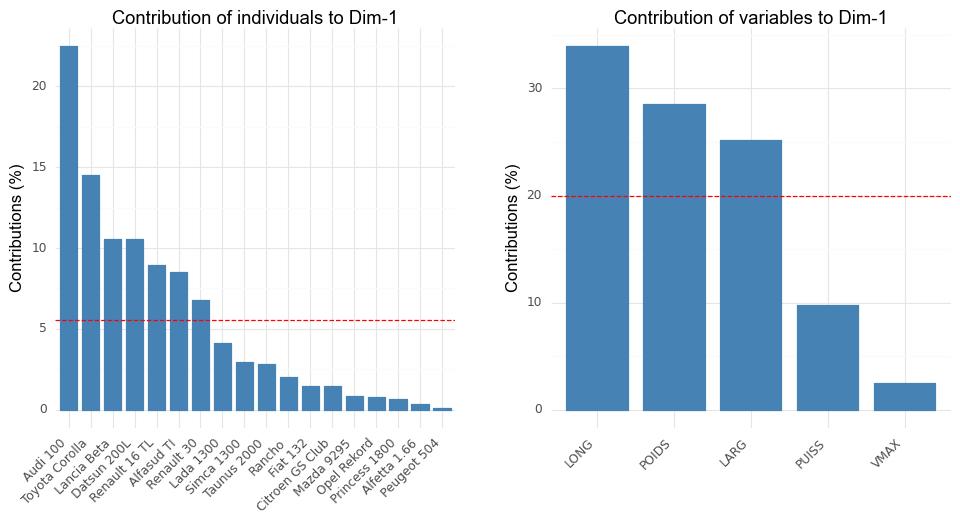

In [21]:
import patchworklib as pw
from scientisttools import fviz_contrib
p1, p2 = fviz_contrib(res_partialpca,choice="ind"),fviz_contrib(res_partialpca,choice="var")
g1, g2 = pw.load_ggplot(p1, figsize=(4,4)), pw.load_ggplot(p2, figsize=(4,4))
(g1|g2).savefig()

## Plot cos2

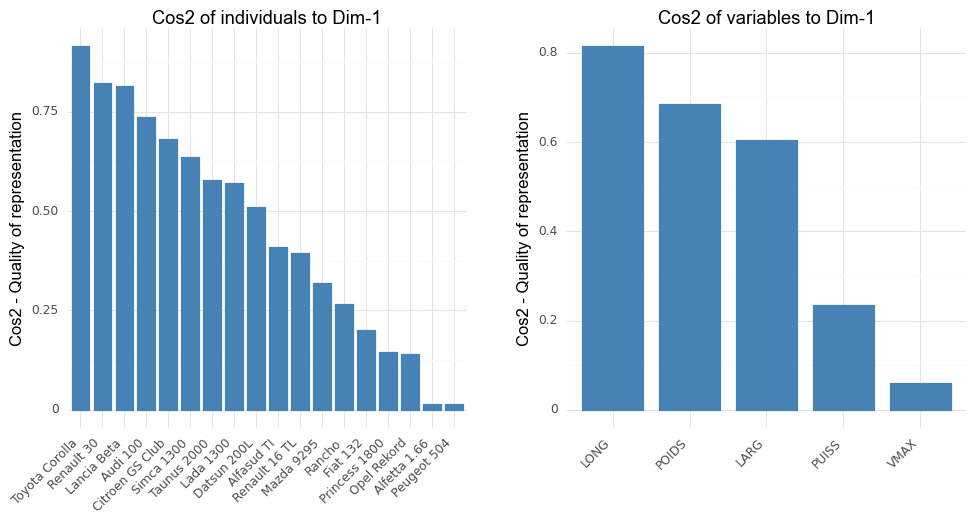

In [22]:
from scientisttools import fviz_cos2
p1, p2 = fviz_cos2(res_partialpca,choice="ind"), fviz_cos2(res_partialpca,choice="var")
g1, g2 = pw.load_ggplot(p1, figsize=(4,4)), pw.load_ggplot(p2, figsize=(4,4))
(g1|g2).savefig()

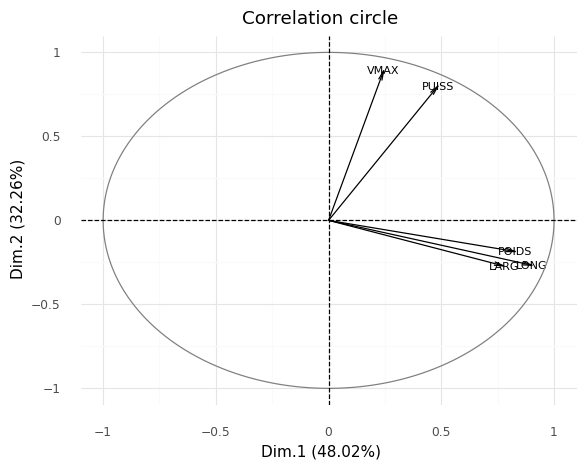

In [23]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_partialpca)
print(p)

## Biplot and 3D graph

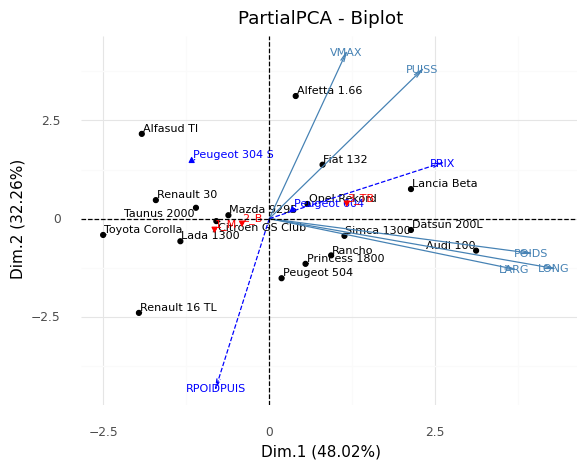

In [24]:
from scientisttools import fviz_partialpca_biplot
p = fviz_partialpca_biplot(res_partialpca)
print(p)

### 3D graph

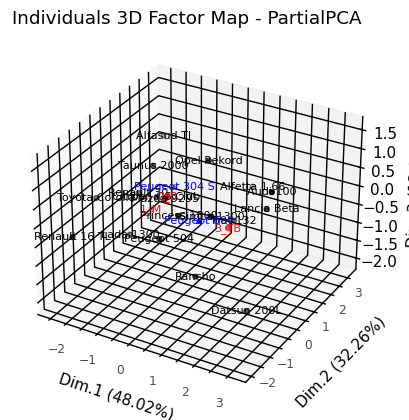

In [25]:
from scientisttools import fviz_partialpca3d_ind
p = fviz_partialpca3d_ind(res_partialpca)
print(p)